In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from imgaug import augmenters as iaa

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
data = []
labels = []
classes = 43
img_size = (26,26)
cur_path = os.getcwd()
#print(cur_path)

In [3]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 10)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
]) # apply augmenters in random order
#images_aug = seq(images=images)

In [4]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'archive/Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            #print(path + '/'+ a)
            image = Image.open(path + '/'+ a)
            image = image.resize(img_size)
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#Converting lists into numpy arrays
data02 = np.array(data)
labels02 = np.array(labels)

In [6]:
print(data02.shape, labels02.shape)

(39209, 26, 26, 3) (39209,)


In [7]:
unique,counts = np.unique(labels02,return_counts=True)
dizionario = dict(zip(unique,counts))
massimo = np.max(counts)
#massimo = np.max(counts)
#massimo = max(dizionario, key=dizionario.get)
#minimo = min(dizionario, key=dizionario.get)
print((massimo))
#print((minimo))
#print(dizionario)

2250


In [8]:
#i=2
#print(len(data02[labels02==i,:,:,:]))
#data_app = data02[labels02==i,:,:,:]
#print(data_app.shape)

In [9]:
#2250//2250

In [10]:
#print(type(data02[labels02==0,:,:,:][0]))
#print(data02[labels02==0,:,:,:][0].shape)
#print(data02[labels02==0,:,:,:][1].shape)

In [11]:
data_augmented=[]
labels_aug = []
count = 0
for i in range(classes):
    n_augments = massimo//counts[i]
    for l in range(counts[i]):
        data_augmented.append(data02[labels02==i,:,:,:][l])
        labels_aug.append(i)
        count += 1
    print("n augments = %5d for class %5d" %(n_augments-1,i) )    
    for j in range(n_augments-1):
#        print(i,j)
        data_aug = seq(images=data02[labels02==i,:,:,:])
#        print(data_aug.shape)   
        for k in range(counts[i]):
            data_augmented.append(data_aug[i,:,:,:])
            labels_aug.append(i)
            count += 1

data_augmented = np.array(data_augmented)
labels_aug = np.array(labels_aug)
print(data_augmented.shape)
print(labels_aug.shape)
#print(type(data_augmented))
#print(data_augmented[0].shape)

n augments =     9 for class     0
n augments =     0 for class     1
n augments =     0 for class     2
n augments =     0 for class     3
n augments =     0 for class     4
n augments =     0 for class     5
n augments =     4 for class     6
n augments =     0 for class     7
n augments =     0 for class     8
n augments =     0 for class     9
n augments =     0 for class    10
n augments =     0 for class    11
n augments =     0 for class    12
n augments =     0 for class    13
n augments =     1 for class    14
n augments =     2 for class    15
n augments =     4 for class    16
n augments =     1 for class    17
n augments =     0 for class    18
n augments =     9 for class    19
n augments =     5 for class    20
n augments =     5 for class    21
n augments =     4 for class    22
n augments =     3 for class    23
n augments =     7 for class    24
n augments =     0 for class    25
n augments =     2 for class    26
n augments =     8 for class    27
n augments =     3 f

In [12]:
#print(counts[24])
print("the starting dataset has dimensions : ",data02.shape)
print("the post processing dataset has dimensions : ", data_augmented.shape)

the starting dataset has dimensions :  (39209, 26, 26, 3)
the post processing dataset has dimensions :  (83007, 26, 26, 3)


In [13]:
print(np.all((data_augmented[labels_aug==2,:,:,:] == data02[labels02==2,:,:,:])))

True


In [14]:
unique_aug,counts_aug = np.unique(labels_aug,return_counts=True)

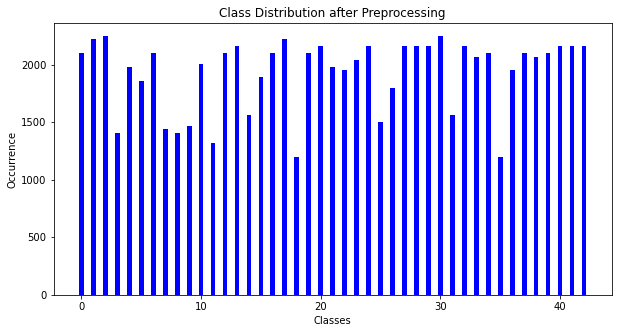

In [15]:
fig = plt.figure(num=1,figsize = (10, 5))
plt.bar(unique_aug, counts_aug, color ='blue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Occurrence")
plt.title("Class Distribution after Preprocessing")
fig.savefig('dist_after_proc.png', dpi=300) 
plt.show()

In [16]:
#print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data_augmented, labels_aug, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(66405, 26, 26, 3) (16602, 26, 26, 3) (66405,) (16602,)


In [17]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Metal device set to: Apple M1 Max


2022-01-14 15:54:31.548499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-14 15:54:31.548629: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model_aug.h5")

2022-01-14 15:54:31.795059: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-14 15:54:31.795922: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-01-14 15:54:38.582316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2076/2076 [==============================] - ETA: 0s - loss: 2.5341 - accuracy: 0.3993

2022-01-14 15:55:01.804996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2076/2076 [==============================] - 33s 12ms/step - loss: 2.5336 - accuracy: 0.3994 - val_loss: 0.1775 - val_accuracy: 0.9550
Epoch 2/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.3513 - accuracy: 0.9058 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 3/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.2161 - accuracy: 0.9442 - val_loss: 0.0702 - val_accuracy: 0.9811
Epoch 4/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.2329 - accuracy: 0.9411 - val_loss: 0.0469 - val_accuracy: 0.9868
Epoch 5/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.2018 - accuracy: 0.9498 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 6/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.1722 - accuracy: 0.9592 - val_loss: 0.1103 - val_accuracy: 0.9726
Epoch 7/50
2076/2076 [==============================] - 25s 12ms/step - loss: 0.1722 - accuracy: 0.9591 - val_loss: 0.0818 - val_accura

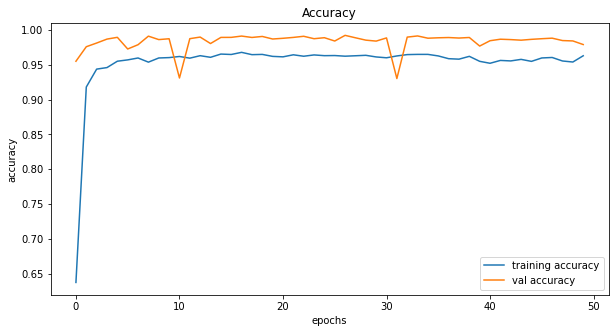

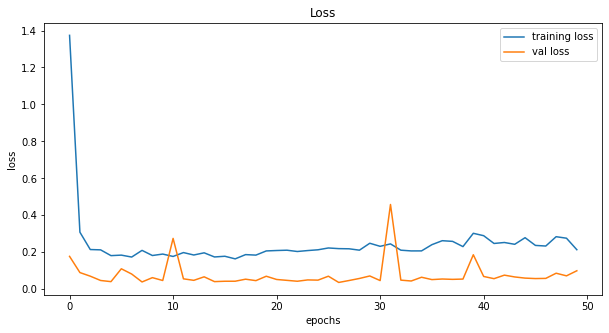

In [19]:
#plotting graphs for accuracy 
fig = plt.figure(num=0,figsize = (10, 5))
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('accuracy_aug.png', dpi=300)
plt.show()

fig = plt.figure(num=1,figsize = (10, 5))
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
fig.savefig('loss_aug.png', dpi=300)
plt.show()

In [20]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

#y_test["Path"] = y_test["Path"].str.cat("archive", sep="/")
#print(y_test["Path"][0:10])

labels = y_test["ClassId"].values

path_img = "./archive/"

imgs = path_img + y_test["Path"].values


data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize(img_size)
    data.append(np.array(image))

X_test=np.array(data)

print(X_test.shape)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

(12630, 26, 26, 3)


/Users/gatsu82/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2022-01-14 16:16:03.857713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.8999208234362629
